In [1]:
# standard imports
import sys, os, datetime, pandas as pd, warnings, importlib, xgboost, sklearn
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import frolic
importlib.reload(frolic)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('../data/tmp.csv')

In [3]:
df

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count
0,49330014,How can I return all results from one table co...,<p>I have something like this:</p>\n\n<pre><co...,49330042.0,1,0,NaN,2018-03-16 21:51:38.587 UTC,NaN,2018-06-03 05:19:16.310 UTC,2018-06-03 05:19:16.310 UTC,NaN,2395282.0,NaN,1604072.0,1,0,mysql|sql,30
1,50663511,How to Change the format of values of a column...,<p>How to Change the 'n' number of timestamp i...,NaN,0,0,NaN,2018-06-03 05:18:45.117 UTC,NaN,2018-06-03 05:18:45.117 UTC,NaN,NaN,NaN,NaN,6897644.0,1,0,javascript|powershell|csv,2
2,50663510,How to design an online test website?,<p>My question revolves about the system desig...,NaN,0,0,NaN,2018-06-03 05:18:39.600 UTC,NaN,2018-06-03 05:18:39.600 UTC,NaN,NaN,NaN,NaN,9874027.0,1,0,system-design,2
3,13722144,folder permissions in liferay,<p>Can any one answer how to change folder per...,NaN,2,1,NaN,2012-12-05 11:21:59.887 UTC,NaN,2018-06-03 05:18:29.880 UTC,NaN,NaN,NaN,NaN,1878833.0,1,2,liferay-ide,1307
4,50662219,Memory Error while trying to read csv on AWS,"<p>When I am running the following code, I am ...",NaN,0,0,NaN,2018-06-03 00:09:14 UTC,1.0,2018-06-03 05:18:25.680 UTC,2018-06-03 05:18:25.680 UTC,NaN,2555451.0,NaN,9885542.0,1,0,python|amazon-ec2,8
5,50663508,Thread 1: signal SIGABRT - I keep getting this...,<p>I create a collection view with the functio...,NaN,0,0,NaN,2018-06-03 05:18:21.923 UTC,NaN,2018-06-03 05:18:21.923 UTC,NaN,NaN,NaN,NaN,9884569.0,1,0,ios|swift|xcode,2
6,43712476,Real life and useful examples of Reverse State...,<p><em>Reverse State monad</em> is really nice...,NaN,0,5,NaN,2017-04-30 23:36:13.440 UTC,3.0,2018-06-03 05:18:16.593 UTC,NaN,NaN,NaN,NaN,2900502.0,1,4,haskell|lazy-evaluation|state-monad,339
7,50663507,Expression on Mongo query,<p>I have a collection which I need to query b...,NaN,0,1,NaN,2018-06-02 18:01:36.470 UTC,NaN,2018-06-03 05:18:15.503 UTC,NaN,NaN,NaN,Hola Soy Edu Feliz Navidad,1615183.0,1,0,mongodb|operator-keyword,2
8,50663315,Compare 64-bit integers by segments,<p>I have two 64-bit integers <code>x</code> a...,50663506.0,1,4,NaN,2018-06-03 04:29:59.400 UTC,1.0,2018-06-03 05:18:08.103 UTC,2018-06-03 04:42:30.643 UTC,NaN,2961927.0,NaN,2961927.0,1,2,c++|bit-manipulation,29
9,50663400,How requiring a module on entry point makes av...,"<p>This is probably a duplicated question, but...",NaN,1,0,NaN,2018-06-03 04:48:58.323 UTC,NaN,2018-06-03 05:18:01.743 UTC,NaN,NaN,NaN,NaN,7491811.0,1,0,node.js|require|winston,8


In [4]:
df['title_len'] = df['title'].str.len()
df['body_len'] = df['body'].str.len()

In [5]:
features = ['title_len', 'body_len', 'answer_count', 'comment_count', 'score']
target = 'view_count'

In [6]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.33, random_state=42)

In [7]:
model = xgboost.XGBRegressor(n_jobs=8)
model.fit(df_train[features], df_train[target])
df_test['view_count_predict'] = model.predict(df_test[features])

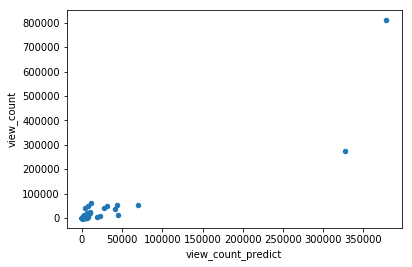

In [8]:
df_test.plot.scatter('view_count_predict', 'view_count')

In [9]:
model.feature_importances_

array([ 0.02195122,  0.23170732,  0.50731707,  0.05121951,  0.18780488], dtype=float32)

In [11]:
frolic.write_pickle(model, '../out/basic_model.pkl')

In [16]:
df[features+[target]].describe()

,title_len,body_len,answer_count,comment_count,score,view_count
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,54.63800,1569.876000,1.18000,1.732000,9.313000,5.608378e+03
std,21.28657,1731.343275,2.23217,2.763659,160.271588,6.071712e+04
min,17.00000,77.000000,0.00000,0.000000,-9.000000,2.000000e+00
25%,40.00000,584.000000,0.00000,0.000000,0.000000,1.000000e+01
50%,51.50000,1028.500000,1.00000,1.000000,0.000000,1.700000e+01
75%,65.00000,1859.750000,1.00000,2.000000,1.000000,3.400000e+01
max,141.00000,20481.000000,34.00000,25.000000,4759.000000,1.625704e+06


In [27]:
ls = [{'title_len': 55, 'body_len': 1570, 'answer_count': 1, 'comment_count': 2, 'score': 9},
      {'title_len': 51, 'body_len': 1028, 'answer_count': 1, 'comment_count': 1, 'score': 0}]

In [28]:
pd.DataFrame(ls)[features]

,title_len,body_len,answer_count,comment_count,score
0,55,1570,1,2,9
1,51,1028,1,1,0


In [31]:
model.predict(pd.DataFrame(ls)[features])

array([ 5695.87695312,   188.36068726], dtype=float32)

In [32]:
model.predict(pd.DataFrame(ls)[features])[0]

5695.877